In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df = pd.read_excel('./MBB.xlsx',engine='openpyxl',thousands = ',')
# df.columns=df.iloc[0,:]
# df.drop(columns=[0,'STT'],inplace=True)
# df.drop(index=0,inplace=True)
# df.reset_index(drop=True,inplace=True)

# df['Ngày'] = pd.to_datetime(df['Ngày'],format='%d-%m-%Y')

# for col in df.columns:
#     try:
#         df[col] = df[col].astype(float)
#     except:
#         pass


# df

In [24]:
df = pd.read_excel('./MBB.xlsx',engine='openpyxl')
df.sort_values(by='Ngày',ascending=True,inplace=True)
# df

mul_thous = ['Đóng Cửa (*)','Mở Cửa (*)','Cao Nhất(*)','Thấp Nhất(*)']
for thing in mul_thous:
    df[thing] = df[thing]*1000


train_col = []
for t in range(1,11):
    df['Đóng Cửa t - ' + str(t)] = df['Đóng Cửa (*)'].shift(t)
    train_col.append('Đóng Cửa t - ' + str(t))

train_col.append('Khối Lượng')
train_col.append('Mở Cửa (*)')

df.dropna(how='any',inplace=True)
df.reset_index(drop=True,inplace=True)

In [6]:
# plt.scatter(df['Đóng Cửa (*)'],df['Khối Lượng'])

In [7]:
# plt.scatter(df['Đóng Cửa (*)'],df['Mở Cửa (*)'])

In [8]:
# train_col = []
# for t in range(1,11):
#     df['Đóng Cửa t - ' + str(t)] = df['Đóng Cửa (*)'].shift(t)
#     train_col.append('Đóng Cửa t - ' + str(t))
# df.dropna(how='any',inplace=True)

In [9]:
# for t in range(1,11):
#     plt.scatter(df['Đóng Cửa (*)'],df['Đóng Cửa t - ' + str(t)])
#     plt.show()
# #     df['Đóng Cửa t - ' + str(t)] = df['Đóng Cửa (*)'].shift(t)

In [10]:
# X_train, X_test, y_train, y_test = train_test_split(df[train_col], df['Đóng Cửa (*)'], test_size=0.35, random_state=42)

In [31]:
train_size = 1500

X_train = df[train_col][:train_size]
X_test =  df[train_col][train_size:]
y_train = df['Đóng Cửa (*)'][:train_size]
y_test = df['Đóng Cửa (*)'][train_size:]

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [33]:
prediction = model.predict(X_test)

In [45]:
def long_only(num):
    if num <=0:
        return 0
    else:
        return round(num,-2)

In [58]:
test = df[train_size:]
test['Predictions'] = prediction
test['Signal'] = test['Predictions'].diff(1)

test['Signal'] = test['Signal'].map(long_only)

# test['Prem'] = test['Signal']*(0.3/100)*test['Mở Cửa (*)']
test['Prem'] = 0 

test['Resp'] = test['Đóng Cửa (*)'].diff(1)
test['Pro'] = test['Signal']*test['Resp'] - test['Prem']
test['Acc_Pro'] = test['Pro'].cumsum()
test.dropna(how='any',inplace=True)
# test

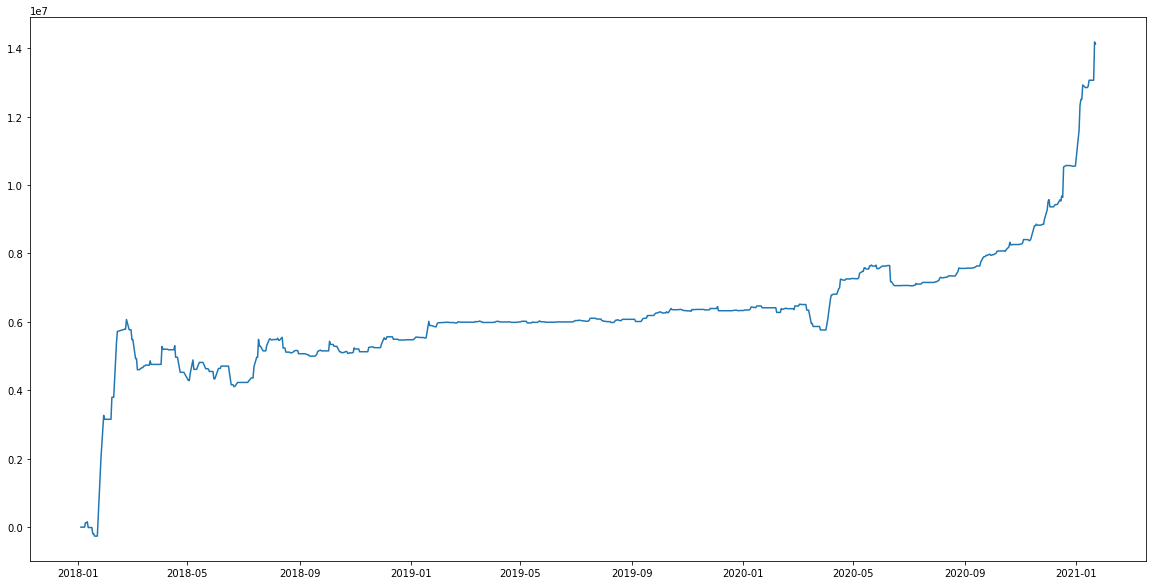

In [59]:
plt.figure(figsize=(20,10))
plt.plot(test['Ngày'],test['Acc_Pro'])

In [52]:
test

,Ngày,Giá Tham Chiếu,+/- (*),% (*),Đóng Cửa (*),Khối Lượng,Mở Cửa (*),Cao Nhất(*),Thấp Nhất(*),Giao Dịch Thỏa Thuận,...,Đóng Cửa t - 7,Đóng Cửa t - 8,Đóng Cửa t - 9,Đóng Cửa t - 10,Predictions,Signal,Prem,Resp,Pro,Acc_Pro
1501,2018-01-04,16.80,0.03,0.19%,16840.0,6492090,16900.0,16960.0,16710.0,0,...,15970.0,16130.0,15940.0,15910.0,16980.001416,0.0,0.0,40.0,0.0,0.0
1502,2018-01-05,16.84,-0.13,-0.76%,16710.0,9788120,16870.0,16900.0,16580.0,0,...,15970.0,15970.0,16130.0,15940.0,16917.087788,0.0,0.0,-130.0,-0.0,0.0
1503,2018-01-08,16.71,0.83,4.97%,17540.0,9182660,16680.0,17540.0,16640.0,90000,...,16040.0,15970.0,15970.0,16130.0,16773.604991,0.0,0.0,830.0,0.0,0.0
1504,2018-01-09,17.54,0.16,0.91%,17700.0,8889960,17630.0,17890.0,17000.0,0,...,16390.0,16040.0,15970.0,15970.0,17587.181687,800.0,42312.0,160.0,85688.0,85688.0
1505,2018-01-10,17.70,0.03,0.18%,17730.0,6605410,17570.0,17950.0,17440.0,50000,...,16230.0,16390.0,16040.0,15970.0,17664.442741,100.0,5271.0,30.0,-2271.0,83417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2244,2021-01-18,26.75,-0.55,-2.06%,26200.0,13838300,26750.0,26850.0,26200.0,500000,...,25900.0,25300.0,25150.0,23950.0,26807.340864,0.0,0.0,-550.0,-0.0,7586764.0
2245,2021-01-19,26.20,-1.80,-6.87%,24400.0,22184900,26200.0,26200.0,24400.0,1771000,...,26600.0,25900.0,25300.0,25150.0,26455.123812,0.0,0.0,-1800.0,-0.0,7586764.0
2246,2021-01-20,24.40,0.00,0%,24400.0,23198100,24400.0,24750.0,22900.0,664000,...,26350.0,26600.0,25900.0,25300.0,24769.495628,0.0,0.0,0.0,0.0,7586764.0
2247,2021-01-21,24.40,1.40,5.74%,25800.0,14714600,25800.0,25800.0,24400.0,520000,...,26150.0,26350.0,26600.0,25900.0,25564.133448,800.0,61920.0,1400.0,1058080.0,8644844.0
